# Homework 9 Problem 1

## Luke Meiler

### Rate of Incline

Using the [PhyPhox](https://phyphox.org/) phone app, we measured the incline of a phone. We will be applying a linear fit to this data, and then we will use the slope of this fit to find the rate at which the phone was tilted. 

As usual we start with some import statements:

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import math

In [2]:
%load_ext pycodestyle_magic
%pycodestyle_on

### Getting the Data

After exporting the data from the PhyPhox app into a csv, we use numpy and some custom functions to get the data into a usable form.

In [4]:
data = np.genfromtxt(fname='LukeMeilerInclinationData.txt', usecols=(0, 1), skip_header=1)
type(data)

numpy.ndarray

1:80: E501 line too long (90 > 79 characters)


In [5]:
def get_vals(data):
    """This function takes the data set generated from the
    numpy genfromtxt function of the three desired columns
    and returns a list of three lists: the times, CH4 levels,
    and uncertainties.

    Parameters:

    data: numpy.ndarry

        The set of data that you wish to rearrange into a list of its
        columns in each list.

    Returns:

    master_list: list

        A list containing a list for each column in the inputed data set
        with the elements of said column.

    """
    time_list = []
    inc_list = []
    master_list = []
    for i in data:
        time_list.append(i[0])
        inc_list.append(i[1])
    master_list.append(time_list)
    master_list.append(inc_list)
    return master_list

In [6]:
data_list = get_vals(data)
time = data_list[0]
incline = data_list[1]

### Plotting the Data

Here we plot the data using matplotlib. As we can see, the data is strongly linear, meaning that the phone was rotated at a very constant rate. This rate will just be the slope of the linear fit that we make.

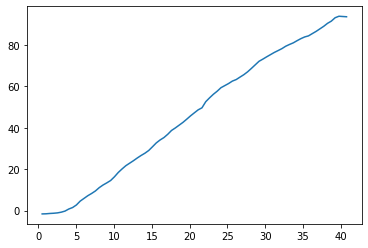

In [7]:
plt.plot(time, incline)

### Making the Fit

In order to make the fit, we use a function from a previous homework. This function will take a list of x and y values and return the fit parameters, $a$ and $b$, as well as the $\sigma^2$ value.

In [8]:
def computeSigma(x_list, y_list):
    """"Takes a list of x and y values. Returns the sigma squared value,
    the a value, and the b value for the data set."""
    x_length = len(x_list)
    y_length = len(y_list)
    s_x = 0
    s_y = 0
    s_xx = 0
    s_xy = 0
    sigma2 = 0
    if x_length != y_length:
        print("Error: X and Y lengths not equal")
        return None
    n = x_length
    if n < 2:
        print("Error: Not enough data points")
        return None
    for i in range(0, n):
        s_x += x_list[i]
        s_y += y_list[i]
        s_xx += x_list[i]**2
        s_xy += x_list[i]*y_list[i]
    den = n * s_xx - s_x*s_x
    if abs(den) < 0.0000001:
        print("Error: Denominator is zero")
        return None
    a = (s_xx * s_y - s_x * s_xy) / den
    b = (n*s_xy - s_x * s_y) / den
    for i in range(0, n):
        sigma2 += (y_list[i] - (a*x_list[i]+b))**2
    sigma2 = sigma2 / (n-2)
#    print(s_x, s_y, s_xx, s_xy, n,a,b,sigma2)
    returnList = []
    returnList.append(sigma2)
    returnList.append(a)
    returnList.append(b)
    return returnList

In [10]:
compute = computeSigma(time, incline)
sigma2 = compute[0]
a = compute[1]
b = compute[2]
print("The fit parameters are: a: {}, b: {}, sigma^2: {}".format(a, b, sigma2))

The fit parameters are: a: -8.092159159470697, b: 2.639922066794625, sigma^2: 61883.41491412405


We can see that the fit line is of the form $y = bx + a$ with these parameters. Now to plot the fit line:

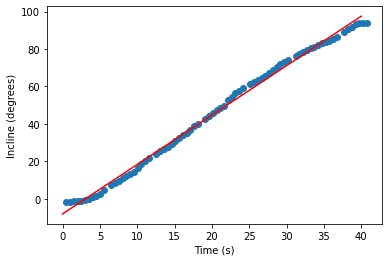

In [11]:
plt.scatter(time, incline)

x_vals = np.linspace(0, 40)
fitline = a + b * x_vals
plt.plot(x_vals, fitline, '-r')
plt.xlabel("Time (s)")
plt.ylabel("Incline (degrees)")
plt.show()

We can visually see that this fit line looks very accurate. We can then say that the rate at which the phone's pitch changed was fairly constant at approximately $2.64 \frac{degrees}{sec}$